In [1]:
import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import xarray as xr
import xclim as xc
import numpy as np
import cmocean
import geopandas as gp

from unseen import fileio

## Shapefile

In [2]:
river_regions_file = '/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/river_regions/river_regions.shp'
river_regions = gp.read_file(river_regions_file)

In [3]:
nec_river_regions = river_regions[river_regions['Division'] == 'North East Coast']
nec_river_regions

,RivRegName,RivRegNum,Division,geometry
62,JARDINE RIVER,23,North East Coast,"MULTIPOLYGON (((143.11986 -12.10931, 143.11958..."
63,BARRON RIVER,10,North East Coast,"POLYGON ((145.52292 -16.67125, 145.52292 -16.6..."
64,MULGRAVE-RUSSELL RIVERS,11,North East Coast,"MULTIPOLYGON (((146.09347 -17.22181, 146.09347..."
65,JOHNSTONE RIVER,12,North East Coast,"MULTIPOLYGON (((146.16181 -17.74292, 146.16181..."
66,TULLY-MURRAY RIVERS,13,North East Coast,"MULTIPOLYGON (((145.99264 -18.12236, 145.99264..."
67,CARDWELL COAST,14,North East Coast,"MULTIPOLYGON (((146.18847 -18.43542, 146.18847..."
68,HINCHINBROOK ISLAND,15,North East Coast,"MULTIPOLYGON (((146.22542 -18.48903, 146.22542..."
69,HERBERT RIVER,16,North East Coast,"MULTIPOLYGON (((145.96431 -18.87903, 145.96431..."
70,BLACK RIVER,17,North East Coast,"MULTIPOLYGON (((146.38292 -19.16319, 146.38292..."
71,ROSS RIVER,18,North East Coast,"MULTIPOLYGON (((146.73819 -19.18014, 146.73819..."


In [11]:
daintree_river_region = nec_river_regions[nec_river_regions['RivRegName'] == 'DAINTREE RIVER']

In [34]:
daintree_river_region

,RivRegName,RivRegNum,Division,geometry
85,DAINTREE RIVER,8,North East Coast,"MULTIPOLYGON (((145.56653 -16.38042, 145.56653..."


In [44]:
daintree_river_region.to_file('/g/data/xv83/dbi599/tc-jasper/shapefiles/daintree_river.shp')

In [ ]:
#mossman_river_region = nec_river_regions[nec_river_regions['RivRegName'] == 'MOSSMAN RIVER']

In [4]:
cc_river_regions = river_regions[river_regions['Division'] == 'Carpentaria Coast']

In [32]:
flood_record_river_regions = nec_river_regions[(nec_river_regions['RivRegNum'].astype(int) > 7) & (nec_river_regions['RivRegNum'].astype(int) < 12)]

In [33]:
flood_record_river_regions

,RivRegName,RivRegNum,Division,geometry
63,BARRON RIVER,10,North East Coast,"POLYGON ((145.52292 -16.67125, 145.52292 -16.6..."
64,MULGRAVE-RUSSELL RIVERS,11,North East Coast,"MULTIPOLYGON (((146.09347 -17.22181, 146.09347..."
85,DAINTREE RIVER,8,North East Coast,"MULTIPOLYGON (((145.56653 -16.38042, 145.56653..."
86,MOSSMAN RIVER,9,North East Coast,"MULTIPOLYGON (((145.68681 -16.72292, 145.68681..."


In [36]:
flood_record_division = flood_record_river_regions.dissolve()
flood_record_division = flood_record_division.drop(columns=['RivRegName', 'RivRegNum'])

In [39]:
flood_record_division['Division'][0] = 'RECORD FNQ FLOOD'

/jobfs/105708108.gadi-pbs/ipykernel_2567524/2850019623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_record_division['Division'][0] = 'RECORD FNQ FLOOD'


In [40]:
flood_record_division

,geometry,Division
0,"MULTIPOLYGON (((145.70625 -16.79097, 145.70625...",RECORD FNQ FLOOD


<Axes: >

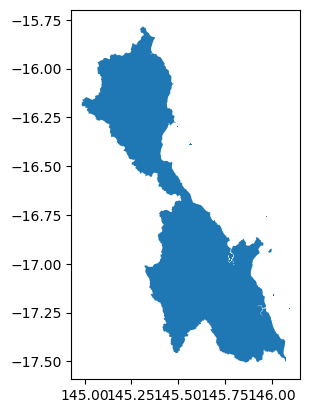

In [41]:
flood_record_division.plot()

In [42]:
flood_record_division.to_file('/g/data/xv83/dbi599/tc-jasper/shapefiles/flood_record.shp')

In [43]:
ls /g/data/xv83/dbi599/tc-jasper/shapefiles/

flood_record.cpg  flood_record.prj  flood_record.shx
flood_record.dbf  flood_record.shp


## Day-by-day rainfall

In [5]:
agcd_file = '/g/data/xv83/agcd-csiro/precip/daily/precip-total_AGCD-CSIRO_r005_20230101-20231231_daily.nc'

In [6]:
ds = xr.open_dataset(agcd_file)

/jobfs/105667558.gadi-pbs/ipykernel_2349201/2674519919.py:10: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


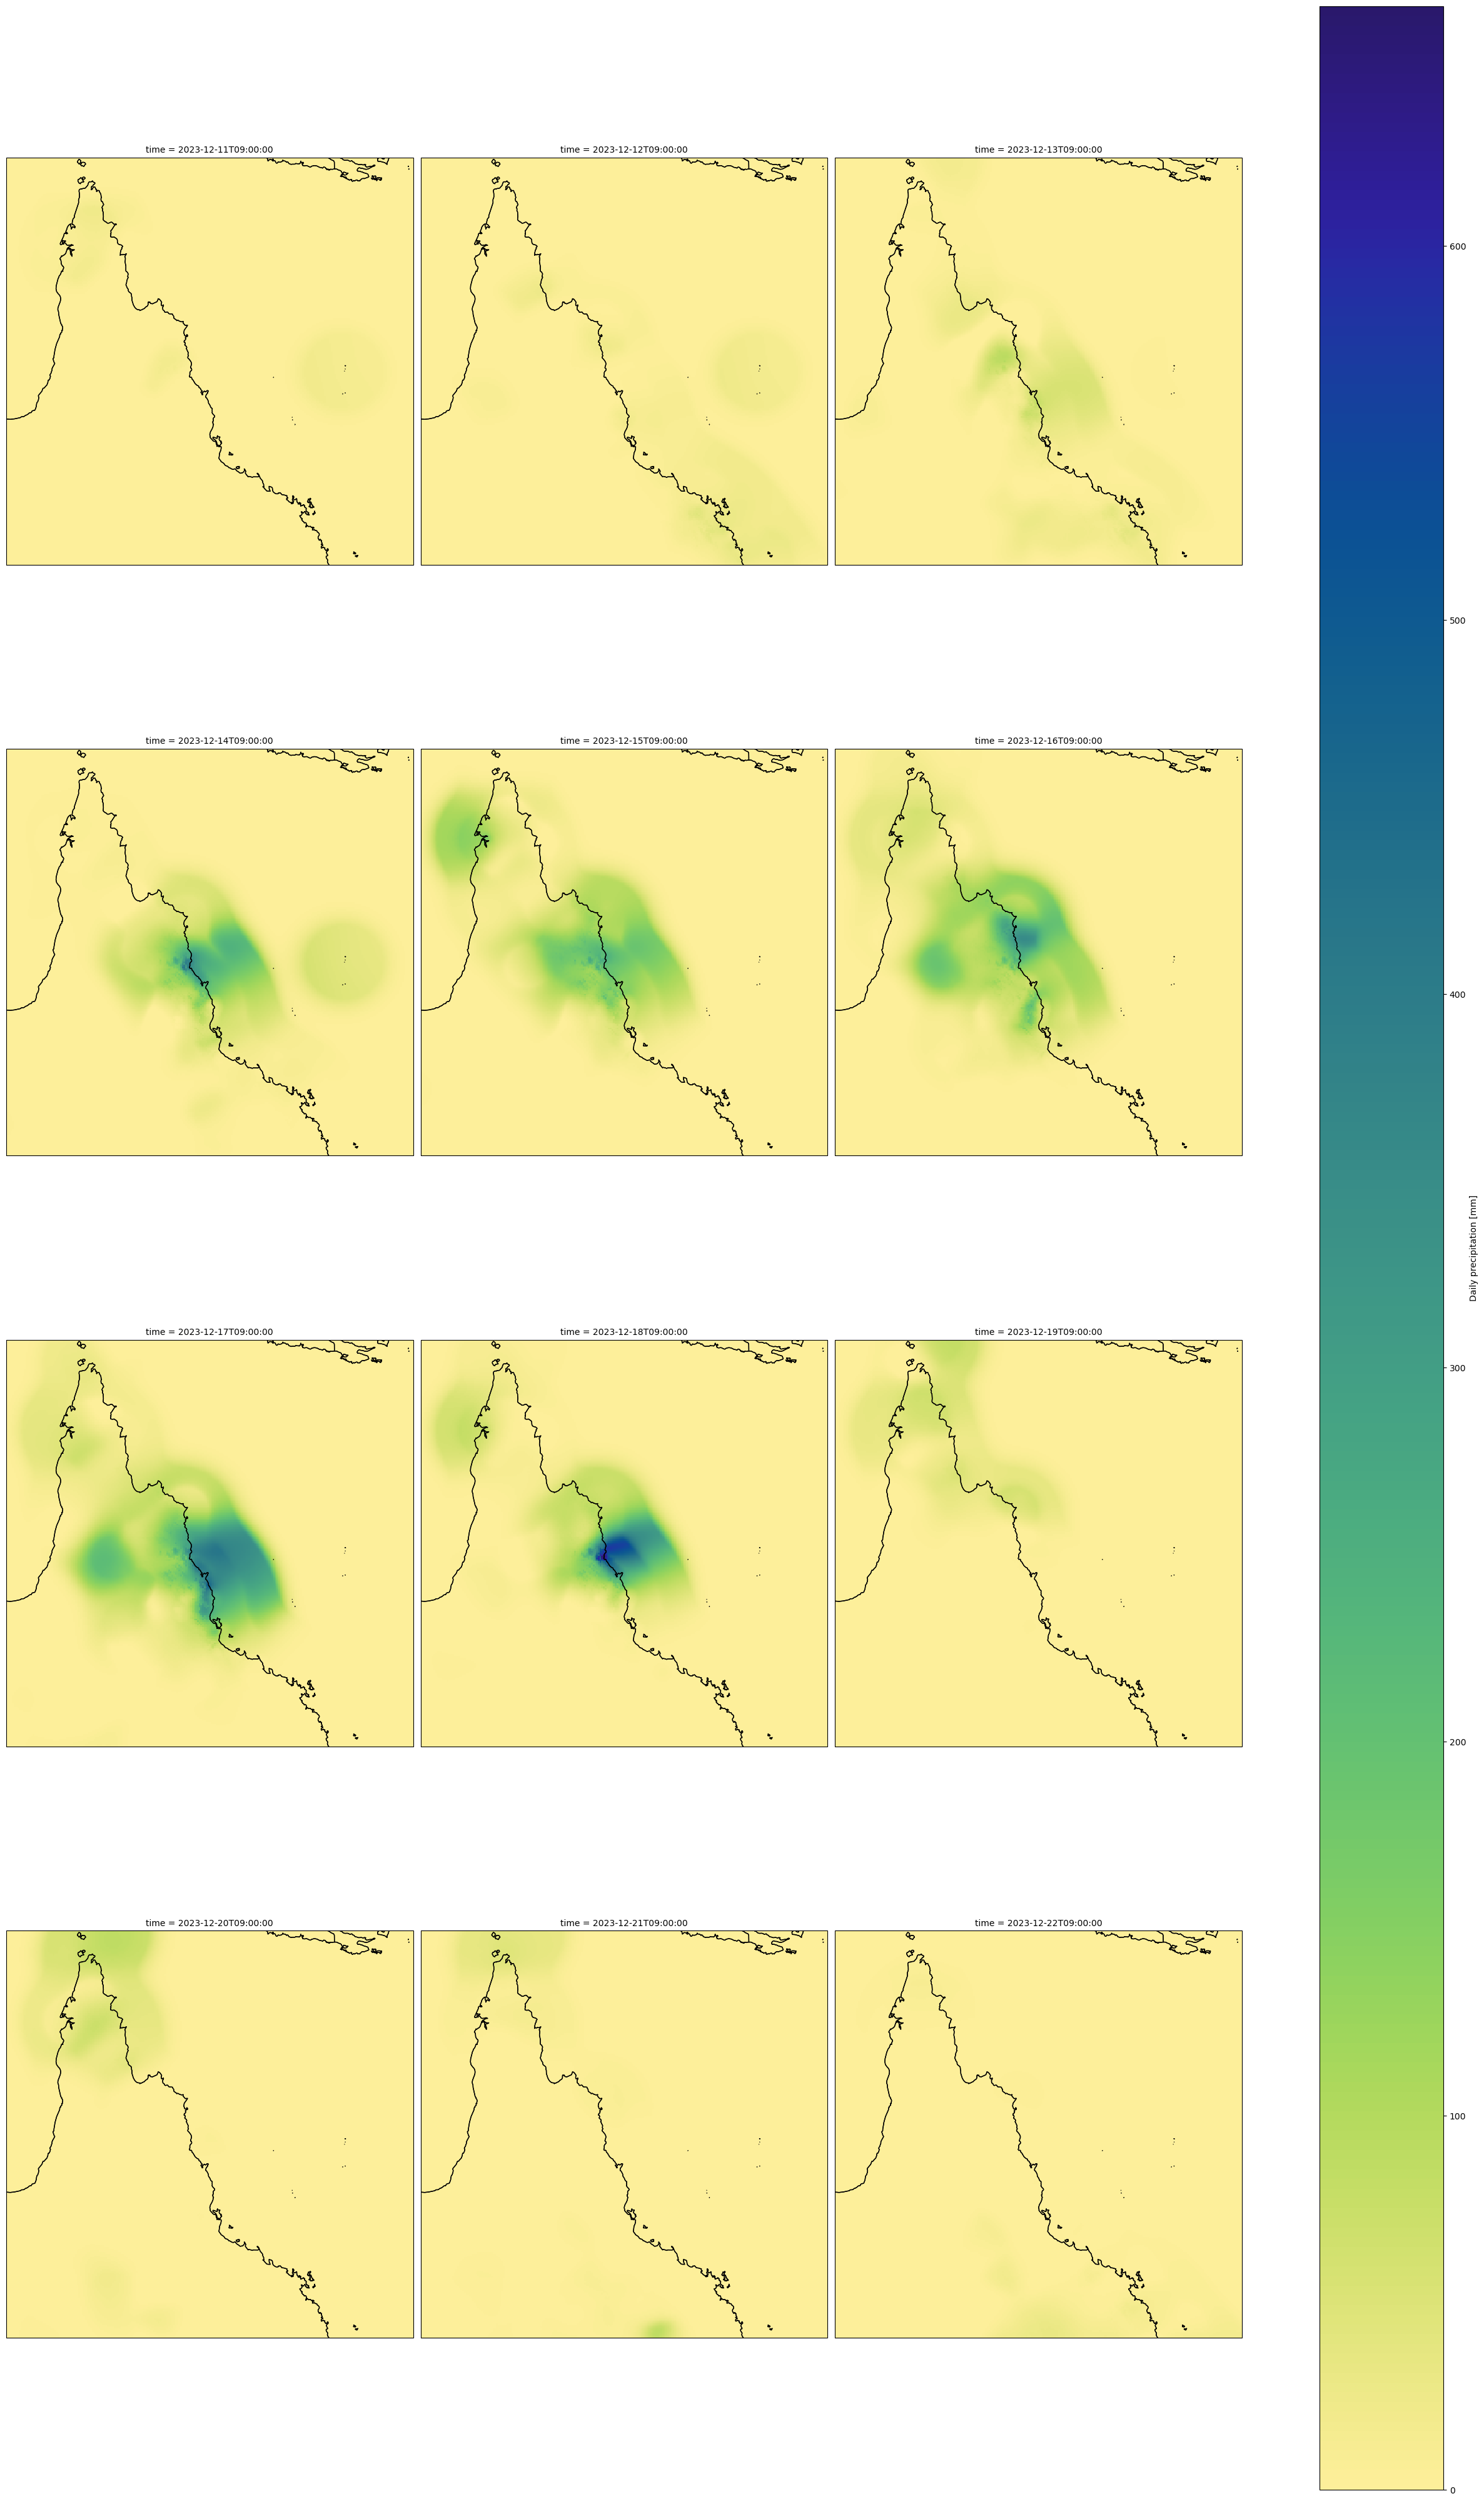

In [45]:
p = ds['precip'].sel(time=slice('2023-12-11', '2023-12-22')).plot(
    col='time',
    col_wrap=3,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    figsize=[25, 40],
    subplot_kws={"projection": ccrs.PlateCarree()},
)

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)
    ax.set_extent([140, 152, -10, -22], crs=ccrs.PlateCarree())

plt.savefig(
    'jasper_day-by-day.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=100
)

## Event summary

In [7]:
ds_masked = fileio.open_dataset(
    agcd_file,
    shapefile='/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/australia/australia.shp'
)
precip_total_masked = ds_masked['precip'].sel(time=slice('2023-12-14', '2023-12-18')).sum(dim=['time'], min_count=1)

In [10]:
def plot_cities(ax, label_color='white'):
    lats = [-17.5328, -16.92, -16.484, -15.4758]
    lons = [146.0311, 145.77, 145.46, 145.2465]
    cities = ['Innisfail', 'Cairns', 'Port Douglas', 'Cooktown']
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'ro', zorder=5, transform=ccrs.PlateCarree())
        ax.text(
            lon + 0.2,
            lat,
            city,
            fontsize='large',
            color=label_color,
            transform=ccrs.PlateCarree()
        )

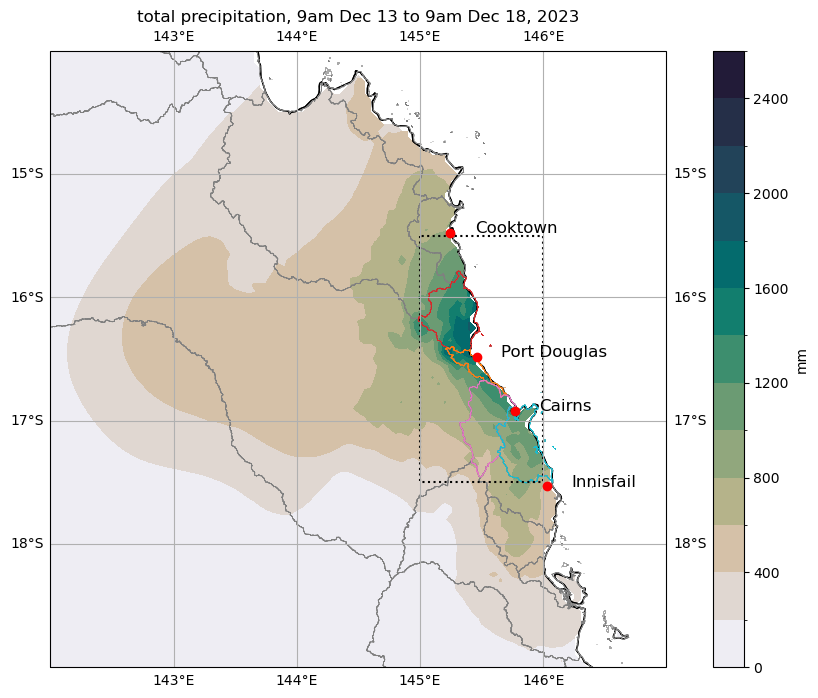

In [11]:
fig = plt.figure(figsize=[12, 8])
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())

pr_levels = np.arange(0, 2601, 200)
cmap = cmocean.cm.rain
# cmocean.cm.haline_r

precip_total_masked.plot.contourf(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=pr_levels,
    cbar_kwargs={'label': 'mm'},
)
ax1.coastlines()
ax1.add_feature(cartopy.feature.STATES)
ax1.add_geometries(
    nec_river_regions.geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='0.5',
)
ax1.add_geometries(
    cc_river_regions.geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='0.5',
)
ax1.add_geometries(
    nec_river_regions[nec_river_regions['RivRegName'] == 'DAINTREE RIVER'].geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='tab:red',
)
ax1.add_geometries(
    nec_river_regions[nec_river_regions['RivRegName'] == 'MOSSMAN RIVER'].geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='tab:orange',
)
ax1.add_geometries(
    nec_river_regions[nec_river_regions['RivRegName'] == 'BARRON RIVER'].geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='tab:pink',
)
ax1.add_geometries(
    nec_river_regions[nec_river_regions['RivRegName'] == 'MULGRAVE-RUSSELL RIVERS'].geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='tab:cyan',
)

ax1.gridlines(draw_labels=True)
ax1.plot(
    [145, 145, 146, 146, 145],
    [-15.5, -17.5, -17.5, -15.5, -15.5],
    transform=ccrs.PlateCarree(),
    color='black',
    linestyle=':'
)

ax1.set_extent([142, 147, -14, -19], crs=ccrs.PlateCarree())
plot_cities(ax1, label_color='black')
ax1.set_title('total precipitation, 9am Dec 13 to 9am Dec 18, 2023')

plt.savefig(
    'jasper_5day_prtot.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=300
)
plt.show()